In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def plotSignal(signals,i = 0):
    %matplotlib inline
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(3)
    for signal in signals:
        if i:
            plt.plot([i for i in range(len(signal))],[s[1] for s in signal])
        else:
            plt.plot([i for i in range(len(signal))],[s[0] for s in signal])
    plt.show()

In [3]:
def InteractivePlot(signals,i = 0):
    %matplotlib notebook
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(3)
    for signal in signals:
        if i:
            plt.plot([i for i in range(len(signal))],[s[1] for s in signal])
        else:
            plt.plot([i for i in range(len(signal))],[s[0] for s in signal])
    plt.show()

In [4]:
def W(n,N):
    return [m.cos(2*m.pi*n/N),m.sin(2*m.pi*n/N)]

def add(a,b):
    x = a[0]+b[0]
    y = a[1]+b[1]
    return [x,y]

def sub(a,b):
    x = a[0]-b[0]
    y = a[1]-b[1]
    return [x,y]

def mult(a,b):
    x = a[0]*b[0]-a[1]*b[1]
    y = a[0]*b[1]+a[1]*b[0]
    return [x,y]

In [5]:
def FFT(signal):  # the passed signal should be complex [x,y]
    if len(signal)==2:
        temp = signal[1] #mult(W(0,len(signal)),signal[1])
        return [add(signal[0],temp),sub(signal[0],temp)]
    else:
        even = [signal[i] for i in range(0,len(signal),2)]
        odd = [signal[i] for i in range(1,len(signal),2)]
        e,o = FFT(even),FFT(odd)
        transform = []
        o = [mult(W(-i,len(signal)),o[i]) for i in [*range(len(o))]]
        for i in range(len(signal)//2):
            transform.append(add(e[i],o[i]))
        for i in range(len(signal)//2):
            transform.append(sub(e[i],o[i]))
        return transform

In [6]:
def derivative(f,n=1):
    n = abs(n)
    fft = FFT(f)
#     plotSignal([fft],1)
#     plotSignal([fft])
    w =  2*m.pi/len(f)
    for j in range(len(fft)):
        k = w*j if j<=len(fft)//2+1 else w*(j-len(fft)) #(len(fft)-j)
        temp1 = fft[j][0]*k**n
        temp2 = fft[j][1]*k**n
        case = abs(n)%4
        if case==0:
            fft[j][0] = temp1
            fft[j][1] = temp2
        elif case==1:
            fft[j][0] = -temp2
            fft[j][1] = temp1
        elif case==2:
            fft[j][0] = -temp1
            fft[j][1] = -temp2
        else:
            fft[j][0] = temp2
            fft[j][1] = -temp1
#     plotSignal([fft],1)
#     plotSignal([fft])
    ifft = FFT(fft)
    ifft.append(ifft.pop(0))
    ifft = list(reversed(ifft))
    return [[ifft[i][0]/len(ifft),0] for i in range(len(ifft))]

In [7]:
def testFunc(df,f):
    fft_f = FFT(f)
    w = 2*m.pi/len(f)   # period of function/L [example: f(x)=cos(x/5) => w=5*2*pi/L]
    for j in range(len(fft_f)):
        k = 1*(j) if j<=len(fft_f)//2 else (j-len(f))
        temp = fft_f[j][0]
        fft_f[j][0] = -fft_f[j][1]*w*k
        fft_f[j][1] = temp*w*k
    fft_df = FFT(df)
    
    #FFT
    print('FFT:')
    print('real:')
    plotSignal([fft_f,fft_df])
    print('imaginary:')
    plotSignal([fft_f,fft_df],1)
    
    #IFFT
    f = FFT(fft_f)
    f.append(f.pop(0))
    f = list(reversed(f))
    f = [[f[i][0]/len(f),f[i][1]/len(f)] for i in range(len(f))]
    
    df = FFT(fft_df)
    df.append(df.pop(0))
    df = list(reversed(df))
    df = [[df[i][0]/len(df),df[i][1]/len(df)] for i in range(len(df))]
    
    print("IFFT:")
    print('real')
    plotSignal([f,df])
    print('imaginary:')
    plotSignal([f,df],1)    

In [8]:
# Fn = [[m.cos(x/2)*m.exp(-x**2/25),0] for x in range(-2**5,2**5)]
# dFn = [[-(m.sin(x)*m.exp(-x**2/25)+(2/25)*x*Fn[x][0]),0] for x in range(-2**5,2**5)]

# Fn = [[1/m.cosh(x/5),0] for x in range(-2**6,2**6)]
# dFn = [[-m.tanh(x/5)/m.cosh(x/5),0] for x in range(-2**6,2**6)]

Fn = [[m.cos(x/4),0] for x in range(-2**6,2**6)]
dFn = [[-m.sin(x/4)/4,0] for x in range(-2**6,2**6)]

FFT:
real:


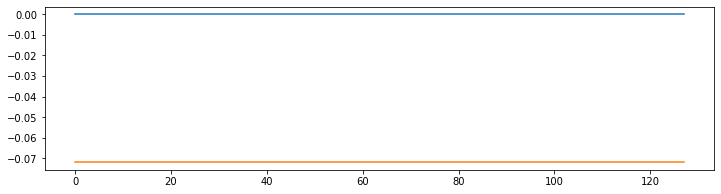

imaginary:


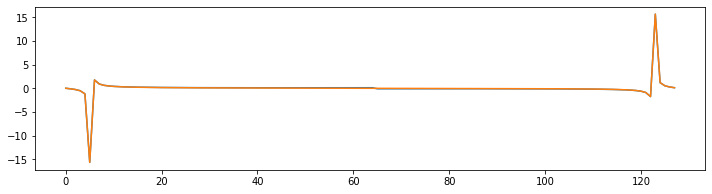

IFFT:
real


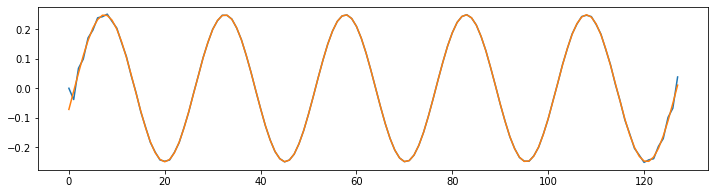

imaginary:


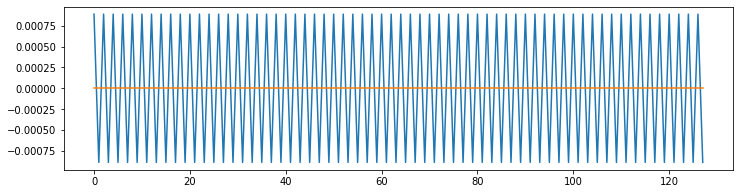

In [9]:
testFunc(dFn,Fn)

<IPython.core.display.Javascript object>


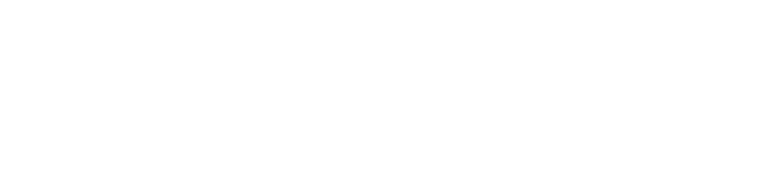

In [10]:
InteractivePlot([Fn,derivative(Fn)])

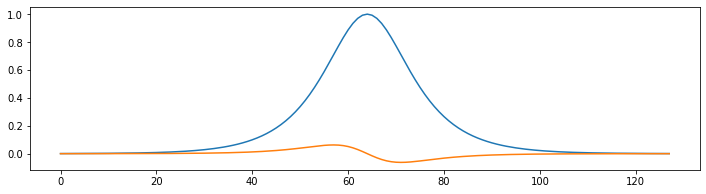

In [11]:
sech = [[1/m.cosh(x/8),0] for x in range(-2**6,2**6)]
plotSignal([sech,derivative(sech,1)])

In [21]:
def integrate(f,n=1):
    n=-abs(n)
    fft = FFT(f)
#     plotSignal([fft],1)
#     plotSignal([fft])
    fft[0][0],fft[0][1]=0,0
    w =  2*m.pi/len(f)
    for j in range(1,len(fft)):
        k = w*j if j<=len(fft)//2+1 else w*(j-len(fft)) #(len(fft)-j)
        temp1 = fft[j][0]/k**abs(n)
        temp2 = fft[j][1]/k**abs(n)
        case = abs(n)%4
        if case==0:
            fft[j][0] = temp1
            fft[j][1] = temp2
        elif case==1:
            fft[j][0] = temp2
            fft[j][1] = -temp1
        elif case==2:
            fft[j][0] = -temp1
            fft[j][1] = -temp2
        else:
            fft[j][0] = -temp2
            fft[j][1] = temp1
#     plotSignal([fft],1)
#     plotSignal([fft])
    ifft = FFT(fft)
    ifft.append(ifft.pop(0))
    ifft = list(reversed(ifft))
    return [[ifft[i][0]/len(ifft),0] for i in range(len(ifft))]

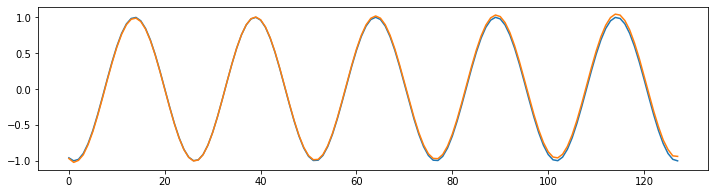

In [22]:
plotSignal([Fn,integrate(dFn)])